# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.patches as mpatches

from IPython.core.display    import HTML
from IPython.display         import Image

## 0.1 Helper Functions

In [2]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 40
    
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
#     plt.rcParams['axes.titlesize']  = 20
#     plt.rcParams['axes.labelsize']  = 16
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    
    
    
#Retirar notação cientifica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
jupyter_settings()

## 0.2 Loading Data

In [4]:
data = pd.read_csv('../data/data_base/Hosts_ids_Itapema.csv')

In [5]:
data.shape

(1357, 12)

In [6]:
data.head()

,host_id,host_name,host_rating,n_reviews,n_reviews_from_host,n_listings,about_host,comments,aquisition_date,ano,mes,dia
0,160913639,Cayo,0.00,0,0,1,NaN,NaN,2022-12-05,2022,12,5
1,84162292,Ricardo,4.93,42,1,3,"Sou casado, tenho uma filha de 9 anos e um fil...","[""Obrigado Ricardo a estadia foi ótima muito ...",2022-12-05,2022,12,5
2,96045548,Eduardo,0.00,26,0,3,NaN,"[""Otimo"", ""muito bom local e muito claro nas e...",2022-12-05,2022,12,5
3,419526733,Korban,0.00,13,0,3,"Korban Empreendimentos, empresa com 3 filiais,...","[""ótimo acesso a praia lugar bem tranquilo.""...",2022-12-05,2022,12,5
4,183738964,Fabiane,4.70,10,0,1,NaN,"[""Ótima localização muito boa hospedagem."", ""...",2022-12-05,2022,12,5


# 1.0 Data Description

In [7]:
df1 = data.copy()

In [8]:
df1.dtypes

host_id                  int64
host_name               object
host_rating            float64
n_reviews                int64
n_reviews_from_host      int64
n_listings               int64
about_host              object
comments                object
aquisition_date         object
ano                      int64
mes                      int64
dia                      int64
dtype: object

## 1.1 Columns

In [9]:
df1.columns

Index(['host_id', 'host_name', 'host_rating', 'n_reviews',
       'n_reviews_from_host', 'n_listings', 'about_host', 'comments',
       'aquisition_date', 'ano', 'mes', 'dia'],
      dtype='object')

## 1.2 Data Dimension

In [10]:
# Dimensão do dataframe e dimensionalidade
print('Numero de colunas do dataframe:  {} '.format(df1.shape[1]) )
print('\nNumero de linhas do dataframe: {} '.format(df1.shape[0]) )

Numero de colunas do dataframe:  12 

Numero de linhas do dataframe: 1357 


## 1.3 Data type

In [11]:
#Verificar os tipos de cada variavel
df1.dtypes

host_id                  int64
host_name               object
host_rating            float64
n_reviews                int64
n_reviews_from_host      int64
n_listings               int64
about_host              object
comments                object
aquisition_date         object
ano                      int64
mes                      int64
dia                      int64
dtype: object

## 1.4 Check Na's

In [12]:
df1.isna().sum()

host_id                   0
host_name                 0
host_rating               0
n_reviews                 0
n_reviews_from_host       0
n_listings                0
about_host             1032
comments                296
aquisition_date           0
ano                       0
mes                       0
dia                       0
dtype: int64

In [13]:
# about_host - na's
df1.loc[df1['about_host'].isna()].head()

,host_id,host_name,host_rating,n_reviews,n_reviews_from_host,n_listings,about_host,comments,aquisition_date,ano,mes,dia
0,160913639,Cayo,0.00,0,0,1,NaN,NaN,2022-12-05,2022,12,5
2,96045548,Eduardo,0.00,26,0,3,NaN,"[""Otimo"", ""muito bom local e muito claro nas e...",2022-12-05,2022,12,5
4,183738964,Fabiane,4.70,10,0,1,NaN,"[""Ótima localização muito boa hospedagem."", ""...",2022-12-05,2022,12,5
6,364423090,Rafael Fernando,5.00,3,0,1,NaN,"[""Não tenha dúvidas na hora de escolheredte ap...",2022-12-05,2022,12,5
7,381438849,Ana,5.00,5,0,1,NaN,"[""Excelente recpeçao responde super rápido sup...",2022-12-05,2022,12,5


In [14]:
# about_host - no na's
df1.loc[~df1['about_host'].isna()].head()

,host_id,host_name,host_rating,n_reviews,n_reviews_from_host,n_listings,about_host,comments,aquisition_date,ano,mes,dia
1,84162292,Ricardo,4.93,42,1,3,"Sou casado, tenho uma filha de 9 anos e um fil...","[""Obrigado Ricardo a estadia foi ótima muito ...",2022-12-05,2022,12,5
3,419526733,Korban,0.00,13,0,3,"Korban Empreendimentos, empresa com 3 filiais,...","[""ótimo acesso a praia lugar bem tranquilo.""...",2022-12-05,2022,12,5
5,78577847,Hugo,5.00,113,11,1,Profissional capacitado e com sólida experiênc...,"[""Excelente apartamento o acesso à praia é rá...",2022-12-05,2022,12,5
12,167170659,Jorge,0.00,0,5,1,"Engenheiro de Segurança do Trabalho, atualment...",NaN,2022-12-05,2022,12,5
15,116817328,Luka,5.00,5,0,2,"Sou Corretora de Imóveis, moro em Florianópoli...","[""Luka é uma excelente anfitriã muita prestat...",2022-12-05,2022,12,5


In [15]:
# comments - na's
df1.loc[df1['comments'].isna()].head()

,host_id,host_name,host_rating,n_reviews,n_reviews_from_host,n_listings,about_host,comments,aquisition_date,ano,mes,dia
0,160913639,Cayo,0.00,0,0,1,NaN,NaN,2022-12-05,2022,12,5
9,237768745,Emerson,0.00,0,0,1,NaN,NaN,2022-12-05,2022,12,5
10,479430333,Neliane,0.00,0,0,1,NaN,NaN,2022-12-05,2022,12,5
11,336892825,Gabriel,0.00,0,7,1,NaN,NaN,2022-12-05,2022,12,5
12,167170659,Jorge,0.00,0,5,1,"Engenheiro de Segurança do Trabalho, atualment...",NaN,2022-12-05,2022,12,5


In [16]:
# comments - No na's
df1.loc[~df1['comments'].isna()].head()

,host_id,host_name,host_rating,n_reviews,n_reviews_from_host,n_listings,about_host,comments,aquisition_date,ano,mes,dia
1,84162292,Ricardo,4.93,42,1,3,"Sou casado, tenho uma filha de 9 anos e um fil...","[""Obrigado Ricardo a estadia foi ótima muito ...",2022-12-05,2022,12,5
2,96045548,Eduardo,0.00,26,0,3,NaN,"[""Otimo"", ""muito bom local e muito claro nas e...",2022-12-05,2022,12,5
3,419526733,Korban,0.00,13,0,3,"Korban Empreendimentos, empresa com 3 filiais,...","[""ótimo acesso a praia lugar bem tranquilo.""...",2022-12-05,2022,12,5
4,183738964,Fabiane,4.70,10,0,1,NaN,"[""Ótima localização muito boa hospedagem."", ""...",2022-12-05,2022,12,5
5,78577847,Hugo,5.00,113,11,1,Profissional capacitado e com sólida experiênc...,"[""Excelente apartamento o acesso à praia é rá...",2022-12-05,2022,12,5


## 1.5 Fill Na's

In [17]:
df1['comments'] = df1['comments'].fillna('no_description')

In [18]:
df1['about_host'] = df1['about_host'].fillna('no_description')

In [19]:
df1.isna().sum()

host_id                0
host_name              0
host_rating            0
n_reviews              0
n_reviews_from_host    0
n_listings             0
about_host             0
comments               0
aquisition_date        0
ano                    0
mes                    0
dia                    0
dtype: int64

## 1.6 Change Type

In [20]:
df1['aquisition_date'] = pd.to_datetime(df1['aquisition_date'])

In [21]:
df1.dtypes

host_id                         int64
host_name                      object
host_rating                   float64
n_reviews                       int64
n_reviews_from_host             int64
n_listings                      int64
about_host                     object
comments                       object
aquisition_date        datetime64[ns]
ano                             int64
mes                             int64
dia                             int64
dtype: object

## 1.7 Statistical Descriptive

In [22]:
# separar todas as variaveis numericas, exceto 'date'
cols_drop = ['host_id','host_name', 'about_host', 'comments','aquisition_date', 'ano', 'mes', 'dia']
num_attributes = df1.drop(cols_drop, axis = 1 )

# variaveis numericas
num_attributes.head()

,host_rating,n_reviews,n_reviews_from_host,n_listings
0,0.00,0,0,1
1,4.93,42,1,3
2,0.00,26,0,3
3,0.00,13,0,3
4,4.70,10,0,1


In [23]:
# separar todas as variaveis categoricas, exceto 'date'
cols_drop = ['host_rating', 'n_reviews', 'n_reviews_from_host', 'n_listings','aquisition_date', 'ano', 'mes', 'dia']
cat_attributes = df1[['host_name', 'about_host', 'comments']]

cat_attributes.head()

,host_name,about_host,comments
0,Cayo,no_description,no_description
1,Ricardo,"Sou casado, tenho uma filha de 9 anos e um fil...","[""Obrigado Ricardo a estadia foi ótima muito ..."
2,Eduardo,no_description,"[""Otimo"", ""muito bom local e muito claro nas e..."
3,Korban,"Korban Empreendimentos, empresa com 3 filiais,...","[""ótimo acesso a praia lugar bem tranquilo.""..."
4,Fabiane,no_description,"[""Ótima localização muito boa hospedagem."", ""..."


### 1.7.1 Numerical Attributes

#### Central Tendency

In [24]:
# media
ct1 = pd.DataFrame( num_attributes.apply(np.mean ) ).T

# mediana
ct2 = pd.DataFrame( num_attributes.apply(np.median ) ).T

#### Dispersion

In [25]:
# min
d1 = pd.DataFrame( num_attributes.apply( np.min ) ).T

#max
d2 = pd.DataFrame( num_attributes.apply( np.max ) ).T

#range
d3 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T

# desvio padrao
d4 = pd.DataFrame( num_attributes.apply( np.std ) ).T

# assimetria - skew
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T

# Curtosi - Kurtosis
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#### Table

In [26]:
table = pd.concat( [d1, d2, d3, ct1, ct2, d4, d5, d6] ).T.reset_index()
table.columns = ['attributes', 'min','max','range','mean', 'median','std','skew','kurtosis']
table

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,host_rating,0.00,5.00,5.00,2.45,2.50,2.30,-0.02,-1.88
1,n_reviews,0.00,8362.00,8362.00,34.21,5.00,261.78,25.86,778.05
2,n_reviews_from_host,0.00,51.00,51.00,1.31,0.00,3.06,6.13,65.84
3,n_listings,0.00,638.00,638.00,3.42,1.00,24.20,20.36,459.35


### 1.7.2 Categorical Attributes

In [27]:
# quantidade de categorias de cada variavel categorica
cat_attributes.apply( lambda x: x.unique().shape[0] )

host_name      898
about_host     325
comments      1060
dtype: int64

# 2.0 Feature Engineering

In [28]:
df2 = df1.copy()
df2.head()

,host_id,host_name,host_rating,n_reviews,n_reviews_from_host,n_listings,about_host,comments,aquisition_date,ano,mes,dia
0,160913639,Cayo,0.00,0,0,1,no_description,no_description,2022-12-05,2022,12,5
1,84162292,Ricardo,4.93,42,1,3,"Sou casado, tenho uma filha de 9 anos e um fil...","[""Obrigado Ricardo a estadia foi ótima muito ...",2022-12-05,2022,12,5
2,96045548,Eduardo,0.00,26,0,3,no_description,"[""Otimo"", ""muito bom local e muito claro nas e...",2022-12-05,2022,12,5
3,419526733,Korban,0.00,13,0,3,"Korban Empreendimentos, empresa com 3 filiais,...","[""ótimo acesso a praia lugar bem tranquilo.""...",2022-12-05,2022,12,5
4,183738964,Fabiane,4.70,10,0,1,no_description,"[""Ótima localização muito boa hospedagem."", ""...",2022-12-05,2022,12,5


## host_rating

In [29]:
df2['host_rating'].unique().shape[0]

203

In [30]:
# create new variable as a categorical host_rating
df2['host_rating_cat'] = ( pd.cut( df2['host_rating'], bins =[-1, 3.0, 3.5,4.0,4.5,5], 
                                   labels = ['no_rating','low','medium','high','very_high'] ) )

In [31]:
df2['host_rating_cat'].unique()

['no_rating', 'very_high', 'high', 'low', 'medium']
Categories (5, object): ['no_rating' < 'low' < 'medium' < 'high' < 'very_high']

In [32]:
df2['host_rating_cat'].value_counts()

no_rating    712
very_high    568
high          36
low           24
medium        17
Name: host_rating_cat, dtype: int64

In [33]:
df2['host_rating_cat'].value_counts(normalize = True)

no_rating   0.52
very_high   0.42
high        0.03
low         0.02
medium      0.01
Name: host_rating_cat, dtype: float64

## n_reviews

In [34]:
df2['n_reviews'].max()

8362

In [35]:
df2['n_reviews_cat'] = ( pd.cut( df2['n_reviews'], bins =[-1, 5.0, 10.0,15.0,20.0,25,8362], 
                                   labels = ['0-5_reviews','5-10_reviews','10-15_reviews','15-20_reviews','20-25_reviews', 
                                             '25-max_reviews'] ) )
df2['n_reviews_cat'].unique()

['0-5_reviews', '25-max_reviews', '10-15_reviews', '5-10_reviews', '15-20_reviews', '20-25_reviews']
Categories (6, object): ['0-5_reviews' < '5-10_reviews' < '10-15_reviews' < '15-20_reviews' < '20-25_reviews' < '25-max_reviews']

# 3.0 Exploratory Data Analysis

In [36]:
df3 = df2.copy()

## 3.1 Univariate Analysis

### Host_rating_cat

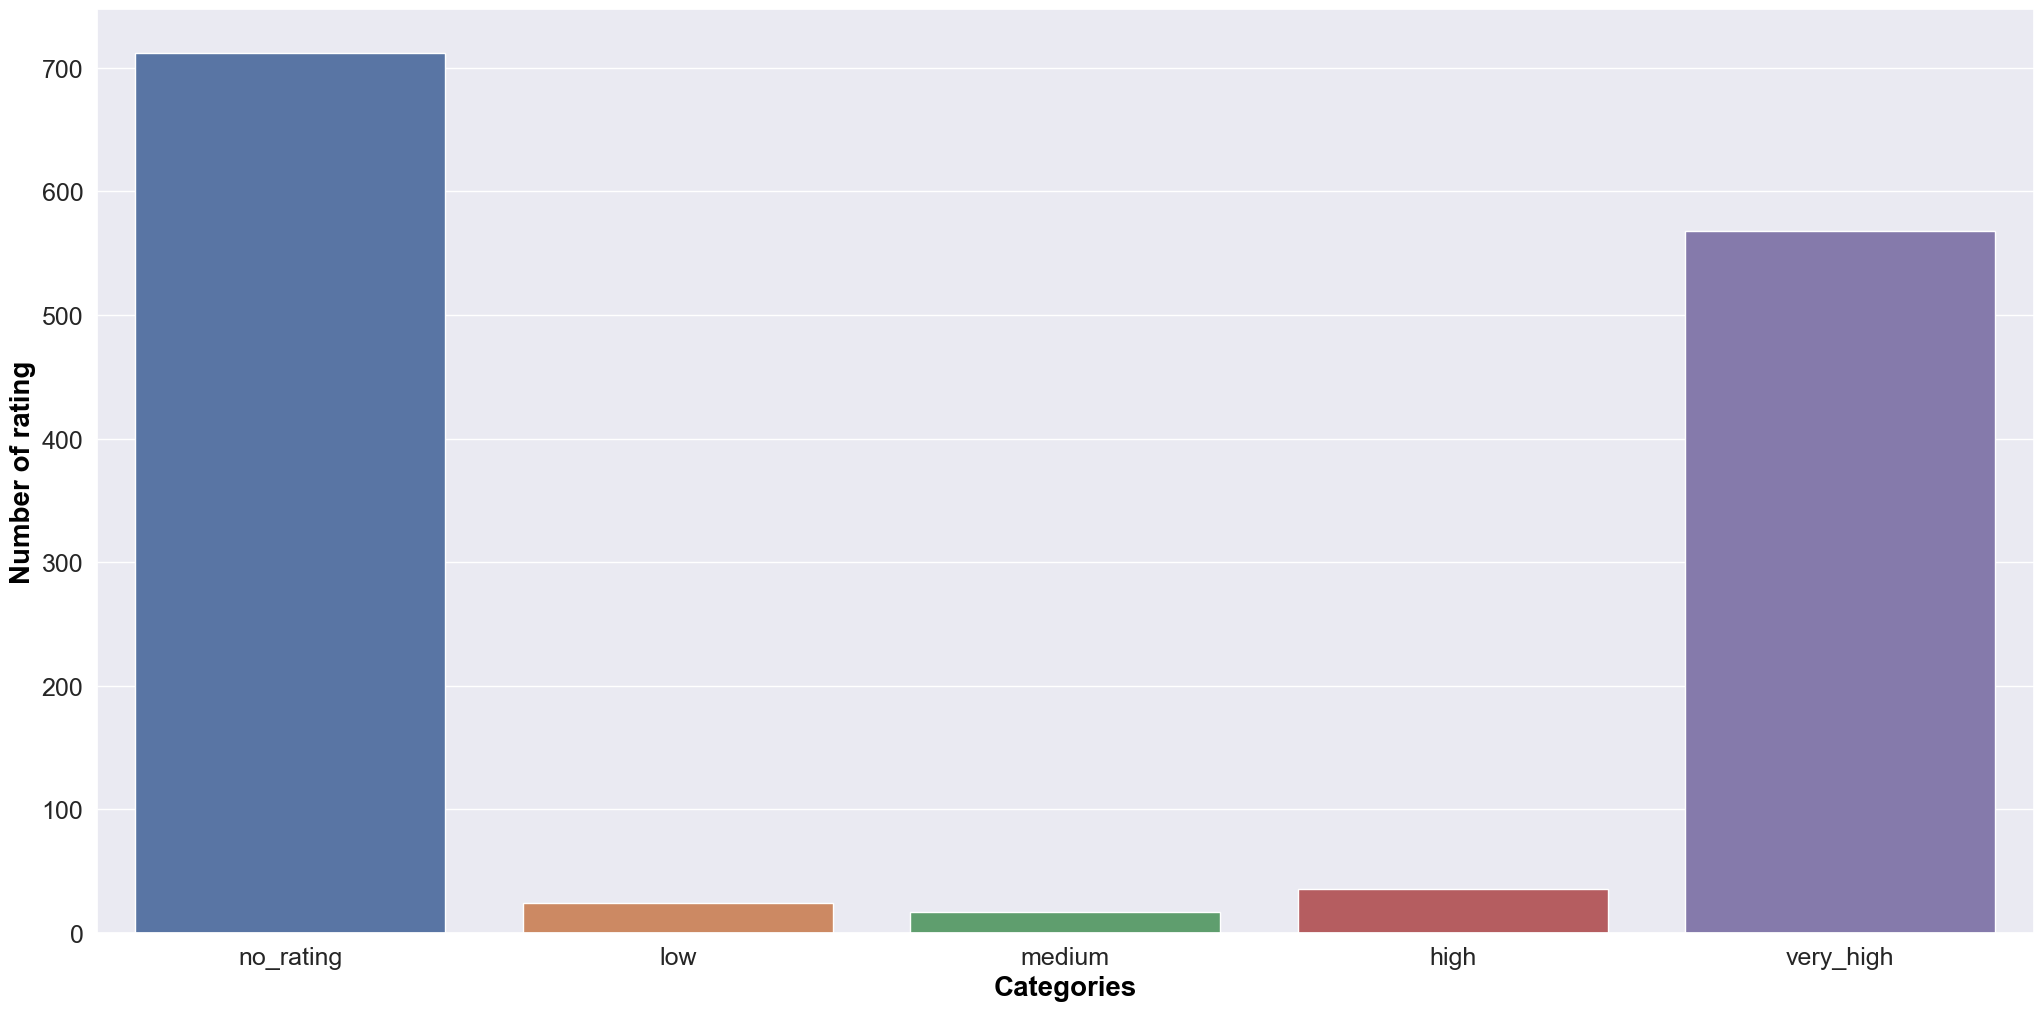

In [37]:
sns.countplot(data = df3, x = 'host_rating_cat');
plt.xlabel('Categories', fontsize = 20, fontweight='bold', color= 'black');
plt.ylabel('Number of rating', fontsize = 20, fontweight = 'bold', color = 'black');

### host_id

In [38]:
df3['host_id'].unique().shape[0]

1357

In [39]:
df3.shape[0]

1357

**All values is a unique host**

### host_name

In [40]:
df3['host_name'].unique()[0:10]

array(['Cayo', 'Ricardo', 'Eduardo', 'Korban', 'Fabiane', 'Hugo',
       'Rafael Fernando', 'Ana', 'Marilu', 'Emerson'], dtype=object)

In [41]:
df3['host_name'].unique().shape[0]

898

In [42]:
df3.loc[(df3['host_name']=='Ricardo')]

,host_id,host_name,host_rating,n_reviews,n_reviews_from_host,n_listings,about_host,comments,aquisition_date,ano,mes,dia,host_rating_cat,n_reviews_cat
1,84162292,Ricardo,4.93,42,1,3,"Sou casado, tenho uma filha de 9 anos e um fil...","[""Obrigado Ricardo a estadia foi ótima muito ...",2022-12-05,2022,12,5,very_high,25-max_reviews
39,187183025,Ricardo,4.71,7,0,1,no_description,"[""Adoramos o Apto camas boas chuveiros ótimo...",2022-12-05,2022,12,5,very_high,5-10_reviews
438,356383311,Ricardo,0.00,2,0,1,no_description,"[""O apto é excelente. Muito espaçoso e uma bel...",2022-12-05,2022,12,5,no_rating,0-5_reviews
518,73239240,Ricardo,5.00,12,1,1,no_description,"[""Ricardo é um excelente anfitrião!"", ""Fomos ...",2022-12-05,2022,12,5,very_high,10-15_reviews
567,20489673,Ricardo,4.29,7,7,1,"abogado, 47\n años casado 2 hijos, hablo españ...","[""El departamento es muy amplio con mucho lug...",2022-12-05,2022,12,5,high,5-10_reviews
575,12495996,Ricardo,0.00,2,1,1,no_description,"[""O apartamento é maravilhoso muito bem local...",2022-12-05,2022,12,5,no_rating,0-5_reviews
826,336024803,Ricardo,4.67,3,1,1,no_description,"[""Apartamento ótimo. Bem localizado e higieniz...",2022-12-05,2022,12,5,very_high,0-5_reviews
831,293117368,Ricardo,0.00,0,0,1,no_description,no_description,2022-12-05,2022,12,5,no_rating,0-5_reviews
1111,94612437,Ricardo,1.58,7,0,3,no_description,"[""Minha estadia foi excelente check in super...",2022-12-05,2022,12,5,no_rating,5-10_reviews


In [43]:
df3.loc[(df3['host_name']=='Ricardo') & (df3['host_id']==84162292)]

,host_id,host_name,host_rating,n_reviews,n_reviews_from_host,n_listings,about_host,comments,aquisition_date,ano,mes,dia,host_rating_cat,n_reviews_cat
1,84162292,Ricardo,4.93,42,1,3,"Sou casado, tenho uma filha de 9 anos e um fil...","[""Obrigado Ricardo a estadia foi ótima muito ...",2022-12-05,2022,12,5,very_high,25-max_reviews


### n_reviews

In [44]:
df3['n_reviews'].unique().shape[0]

144

### n_reviews_cat

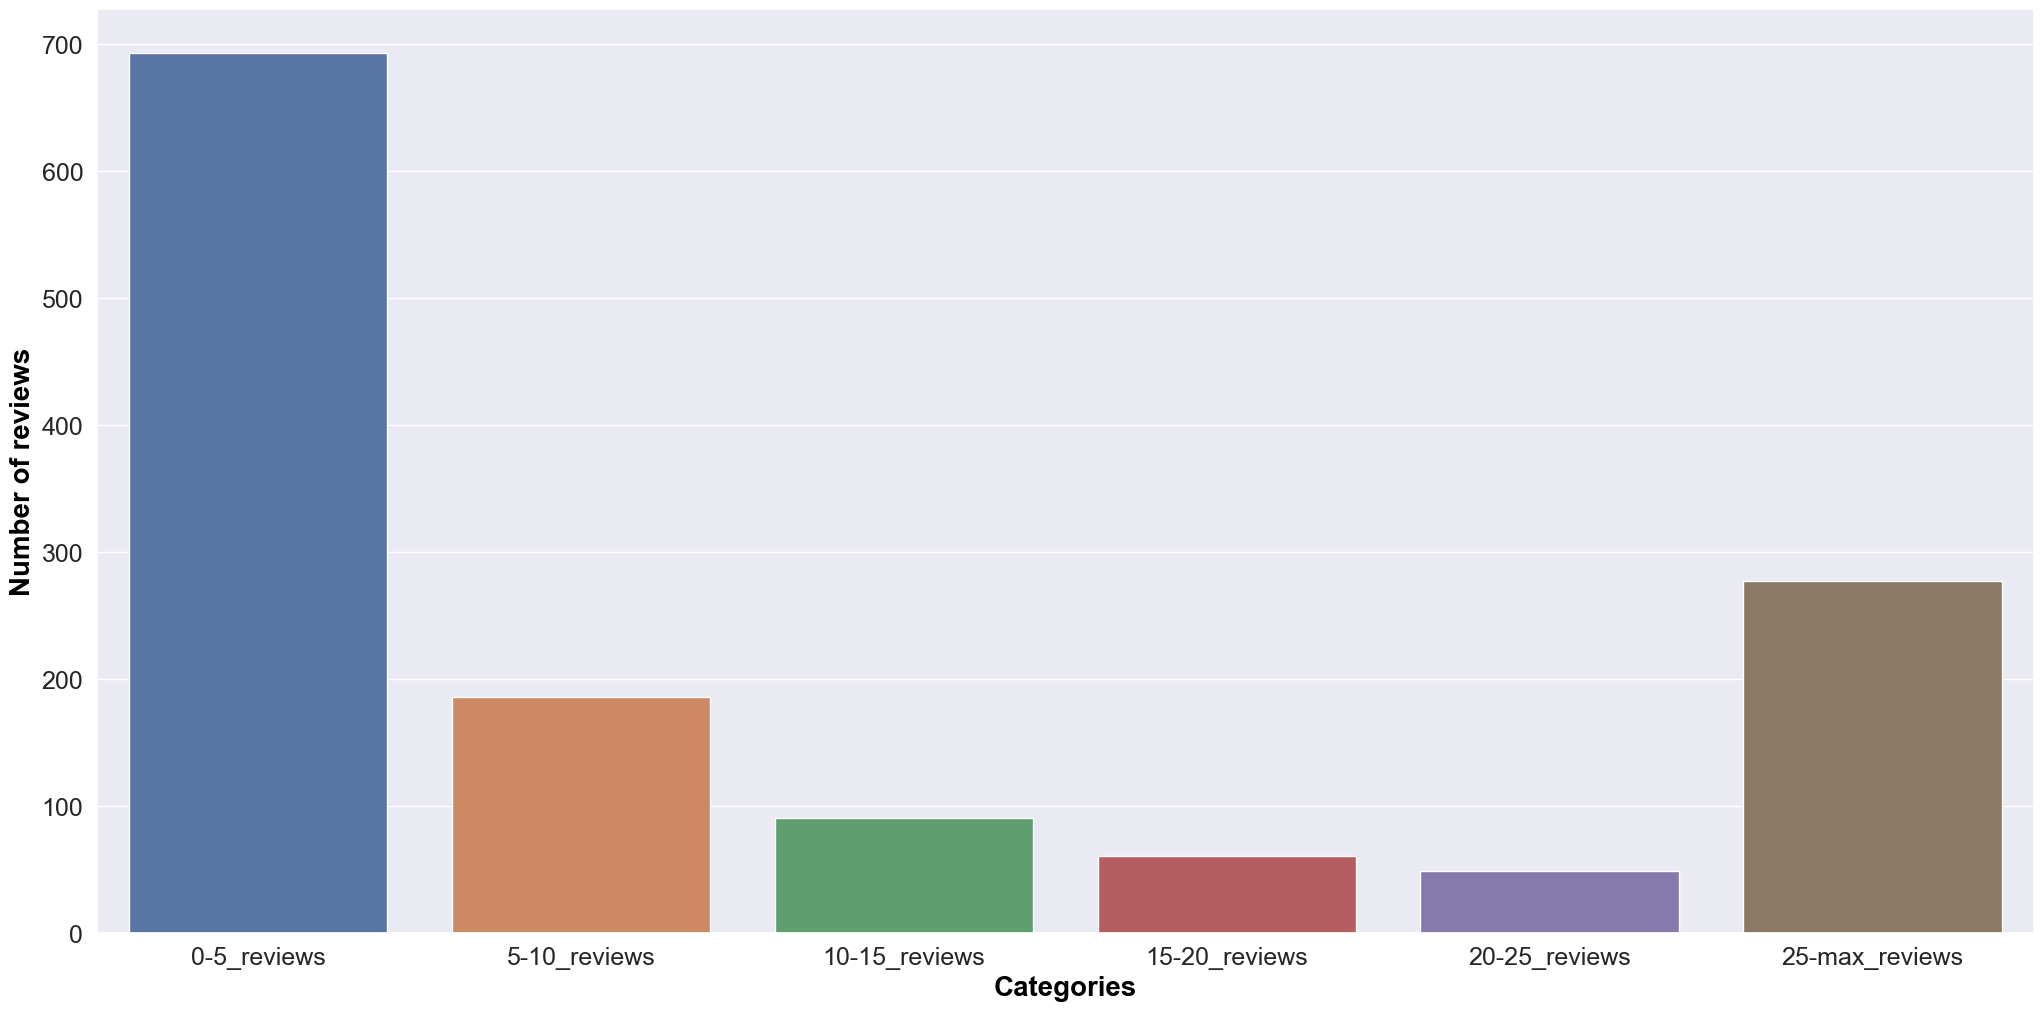

In [45]:
sns.countplot(data = df3, x = 'n_reviews_cat');
plt.xlabel('Categories', fontsize=20, fontweight = 'bold', color = 'black');
plt.ylabel('Number of reviews', fontsize=20, fontweight = 'bold', color = 'black');

### n_reviews_from_host

In [46]:
df3['n_reviews_from_host'].unique().shape[0]

23

In [47]:
df3['n_reviews_from_host'].unique()

array([ 0,  1, 11,  7,  5,  2,  8,  3,  4,  6, 10,  9, 13, 15, 12, 17, 14,
       29, 20, 18, 27, 23, 51])

In [48]:
df3['n_reviews_from_host'].value_counts()

0     839
1     195
2     110
3      55
5      37
4      37
6      24
7      13
8      10
10      6
9       6
13      5
17      4
11      3
15      3
14      3
12      1
29      1
20      1
18      1
27      1
23      1
51      1
Name: n_reviews_from_host, dtype: int64

In [49]:
df3['n_reviews_from_host'].value_counts(normalize = True)

0    0.62
1    0.14
2    0.08
3    0.04
5    0.03
4    0.03
6    0.02
7    0.01
8    0.01
10   0.00
9    0.00
13   0.00
17   0.00
11   0.00
15   0.00
14   0.00
12   0.00
29   0.00
20   0.00
18   0.00
27   0.00
23   0.00
51   0.00
Name: n_reviews_from_host, dtype: float64

### n_listings

In [50]:
df3['n_listings'].unique().shape[0]

32

In [51]:
df3['n_listings'].unique()

array([  1,   3,   2,   9,   4,  10,  20,   7,   5,  14,   6, 114, 339,
         8,  22,  43, 638,  32,  52, 441,  18,  35,  87,  21,  23,  13,
        15,   0, 230,  11,  26,  17])

In [52]:
df3['n_listings'].value_counts()

1      876
2      237
3      101
4       44
5       29
6       13
7       10
9        9
8        6
10       4
23       2
13       2
22       2
35       2
14       2
26       2
230      1
0        1
87       1
15       1
21       1
11       1
638      1
18       1
441      1
52       1
32       1
43       1
339      1
114      1
20       1
17       1
Name: n_listings, dtype: int64

In [53]:
df3['n_listings'].value_counts(normalize = True)

1     0.65
2     0.17
3     0.07
4     0.03
5     0.02
6     0.01
7     0.01
9     0.01
8     0.00
10    0.00
23    0.00
13    0.00
22    0.00
35    0.00
14    0.00
26    0.00
230   0.00
0     0.00
87    0.00
15    0.00
21    0.00
11    0.00
638   0.00
18    0.00
441   0.00
52    0.00
32    0.00
43    0.00
339   0.00
114   0.00
20    0.00
17    0.00
Name: n_listings, dtype: float64